# Experimento variando el valor de gamma

In [14]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt
import os

In [15]:
# Cargamos imagen, se convierte a matriz
image = imread('../Gamma/G1.0.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [16]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [17]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

<class 'numpy.ndarray'>
Shape of the image (1024, 1280)


In [18]:
# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

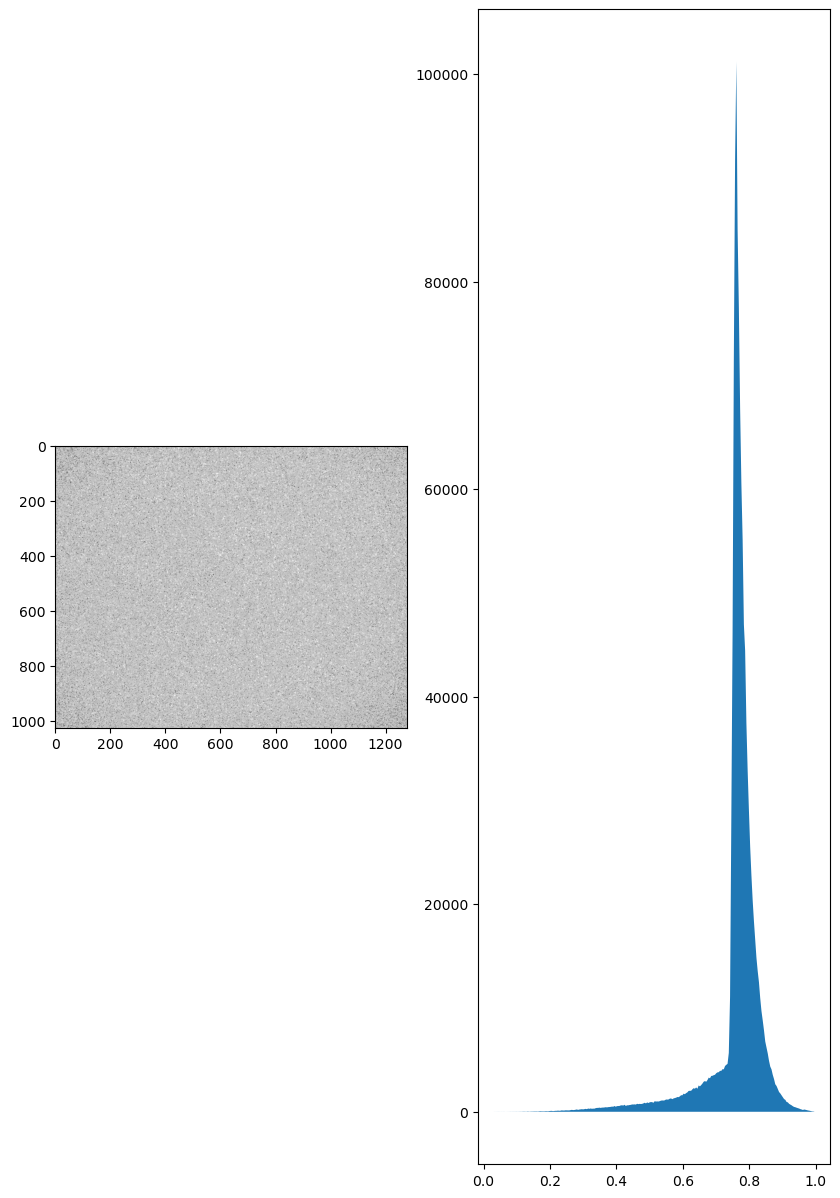

In [19]:
# No se agrega para analisis solo para visualizacion de la imagen
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)

In [20]:
# Calculamos el promedio de intensidad
average_intensity = image.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')

Promedio de intensidad: 0.7593252062797546
Punto máximo en valor de número de píxeles: 101175
Máximo de intensidad: 0.7613217234611511


## Analisis para todas las imagenes

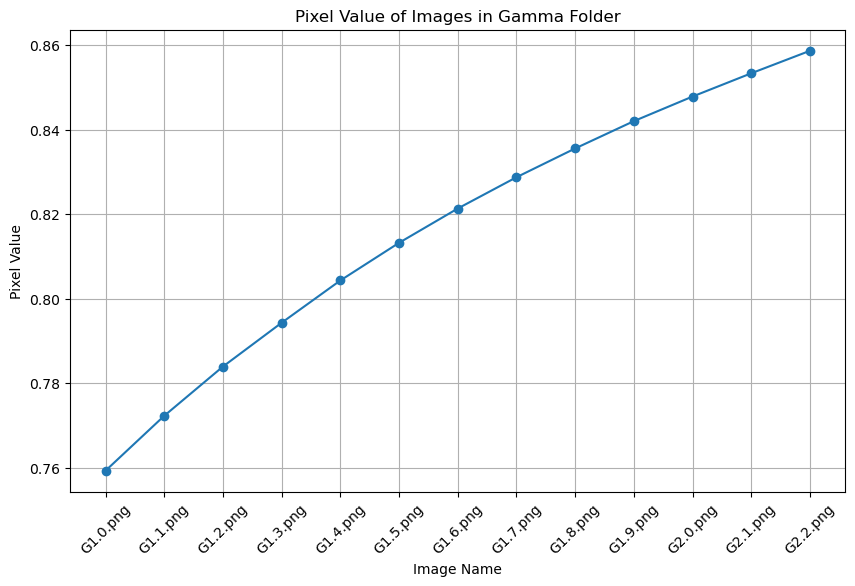

,image_name,average_intensity
0,G1.0.png,0.759325
1,G1.1.png,0.772314
2,G1.2.png,0.783960
3,G1.3.png,0.794325
4,G1.4.png,0.804327
5,G1.5.png,0.813236
6,G1.6.png,0.821346
7,G1.7.png,0.828744
8,G1.8.png,0.835556
9,G1.9.png,0.842018


In [24]:
# Definir la ruta de la carpeta donde están las imágenes
folder_path = '../Gamma/'

# Inicializar una lista para almacenar los promedios de intensidad
intensity_data = []

# Recorrer todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Cargar la imagen
        image = imread(os.path.join(folder_path, filename))
        
        # Verificamos si la imagen tiene 4 canales
        if image.shape[-1] == 4:
            # Elimina el canal alfa
            image = image[..., :3]
        
        # Convertimos la imagen a escala de grises
        image = rgb2gray(image)
        
        # Calcular el promedio de intensidad
        average_intensity = image.mean()
        
        # Almacenar los datos en la lista
        intensity_data.append({'image_name': filename, 'average_intensity': average_intensity})

# Convertir la lista a un DataFrame
df_intensity = pd.DataFrame(intensity_data)

# Graficar los promedios de intensidad
plt.figure(figsize=(10, 6))
plt.plot(df_intensity['image_name'], df_intensity['average_intensity'], marker='o')
plt.xlabel('Image Name')
plt.ylabel('Pixel Value')
plt.title('Pixel Value of Images in Gamma Folder')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Mostrar el DataFrame con los datos
df_intensity
